In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [26]:
df =pd.read_csv('train.csv')

In [27]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [28]:
df['Embarked'] = df['Embarked'].map({'C':0,'Q':1,'S':2})

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


In [30]:
#Look at top values of train data 

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,2.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,0.0


In [31]:
#Print the column names of train data

print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [32]:
#Print the dimension of train and test data

print(df.shape)

(891, 12)


In [33]:
#Print the number of missing values in each column of train and test data



In [34]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


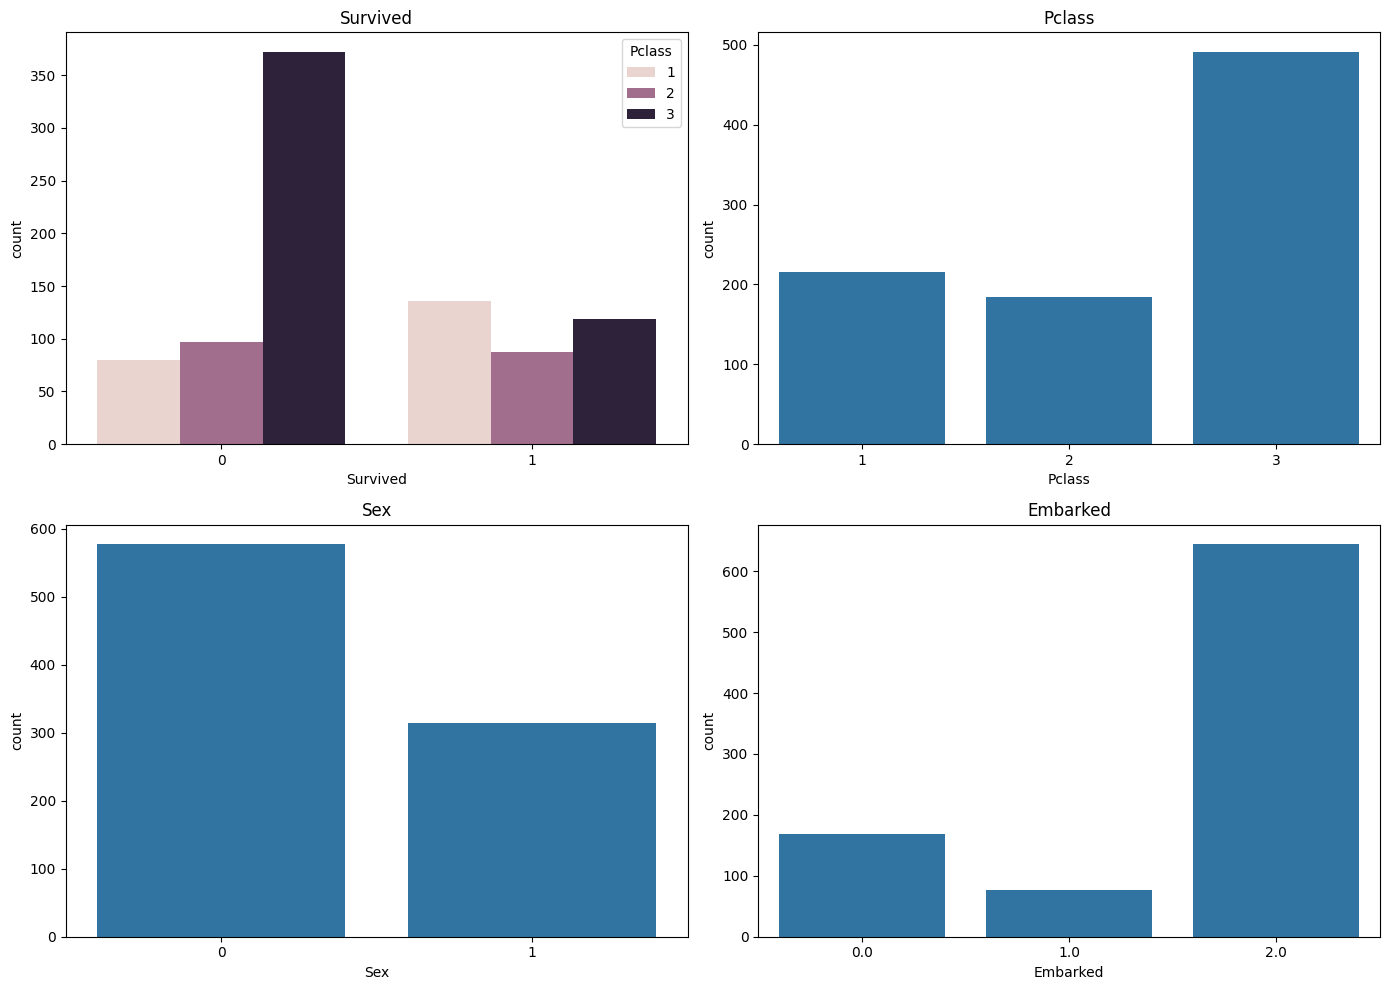

In [35]:
#Barchart of Survived, Pclass, Sex, Embarked
fig ,axes = plt.subplots(2,2,figsize = [14,10])

sns.countplot(x='Survived',data=df,ax=axes[0,0],hue="Pclass")
axes[0,0].set_title("Survived")


sns.countplot(x='Pclass',data=df,ax=axes[0,1])
axes[0,1].set_title("Pclass")

sns.countplot(x='Sex',data=df,ax=axes[1,0])
axes[1,0].set_title("Sex")


sns.countplot(x='Embarked',data=df,ax=axes[1,1])
axes[1,1].set_title("Embarked")

plt.tight_layout()
plt.show()

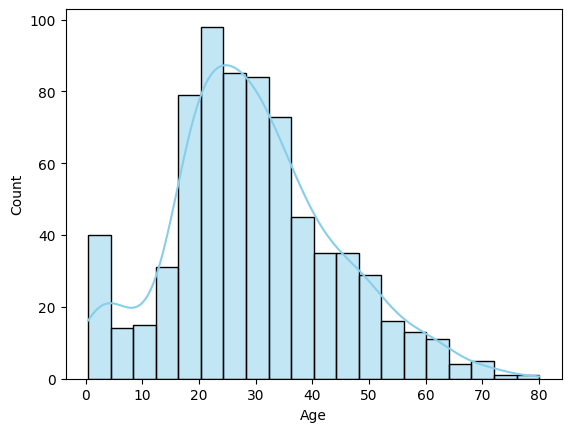

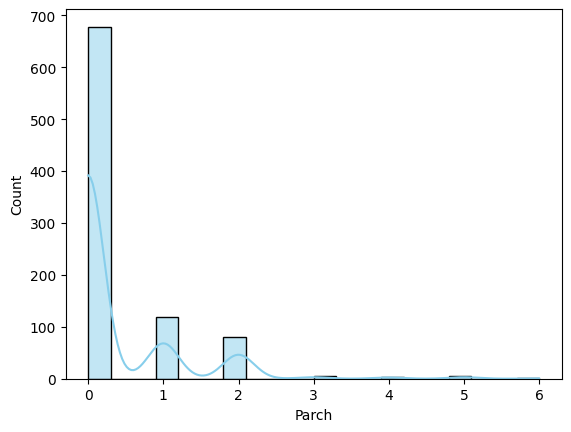

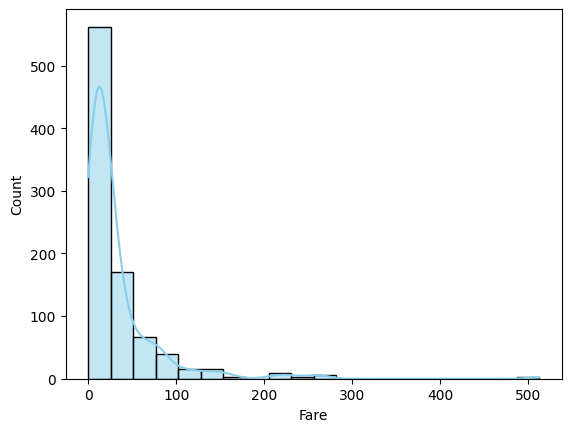

In [36]:
#Histogram of Age, Parch, Fare


sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.show()

sns.histplot(df['Parch'], bins=20, kde=True, color='skyblue')
plt.show()

sns.histplot(df['Fare'], bins=20, kde=True, color='skyblue')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

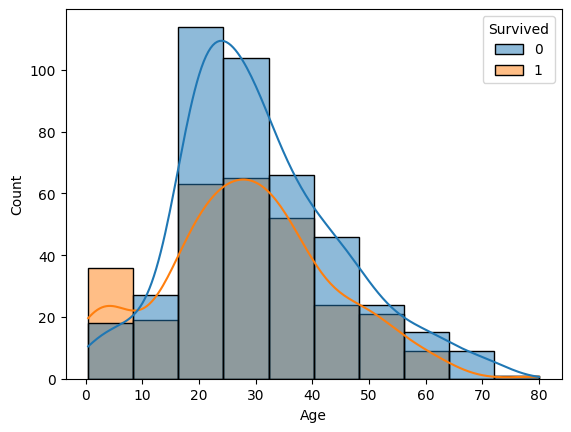

In [44]:
#Plot histogram of age for survived and did not survived class
#sns.histplot(df[df["Survived"] == 1]["Age"], kde=True, color="blue", label="Survived")
#sns.histplot(df[df["Survived"] == 0]["Age"], kde=True, color="red", label="Not Survived")
#plt.legend()
#plt.show()
sns.histplot(data=df,x="Age",hue="Survived",kde=True,bins=10)

In [45]:
df["Embarked"].fillna('S',inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [46]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

age_mean = df["Age"].mean()
age_std = df["Age"].std()
df["Age"].fillna(np.random.randint(age_mean - age_std, age_mean + age_std), inplace=True)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
# Create and add a new feature FamilyS  size as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,1


In [19]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False


df['IsAlone'] = (df["FamilySize"] == 1).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,1,1


In [20]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin


df.drop(columns = ['PassengerId','Name','Ticket','Cabin'] , inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,2.0,2,0
1,1,1,1,38.0,1,0,71.2833,0.0,2,0
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,0
4,0,3,0,35.0,0,0,8.0500,2.0,1,1


In [21]:
#Prepare X and y

x = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','FamilySize','IsAlone']
y = ['Survived']

In [1]:
# Label encoding of categorical features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode the 'Embarked' column
df['Embarked'] = le.fit_transform(df['Embarked'])

# Encode the 'Sex' column
df['Sex'] = le.fit_transform(df['Sex'])

df.head()


NameError: name 'df' is not defined

In [50]:
import pandas as pd 
df =pd.read_csv("train.csv")

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
df.shape

(891, 12)

In [54]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
df['Embarked'].fillna('s')

0      s
1      s
2      s
3      s
4      s
      ..
886    s
887    s
888    s
889    s
890    s
Name: Embarked, Length: 891, dtype: object

In [56]:
df['Embarked'].dtype

dtype('O')

In [48]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [83]:
df['Embarked']=pd.to_numeric(df['Embarked'],errors='coerce')

In [84]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

In [85]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,NaN
1,1,female,38.0,1,0,71.2833,NaN
2,3,female,26.0,0,0,7.9250,NaN
3,1,female,35.0,1,0,53.1000,NaN
4,3,male,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN
887,1,female,19.0,0,0,30.0000,NaN
888,3,female,NaN,1,2,23.4500,NaN
889,1,male,26.0,0,0,30.0000,NaN


In [86]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

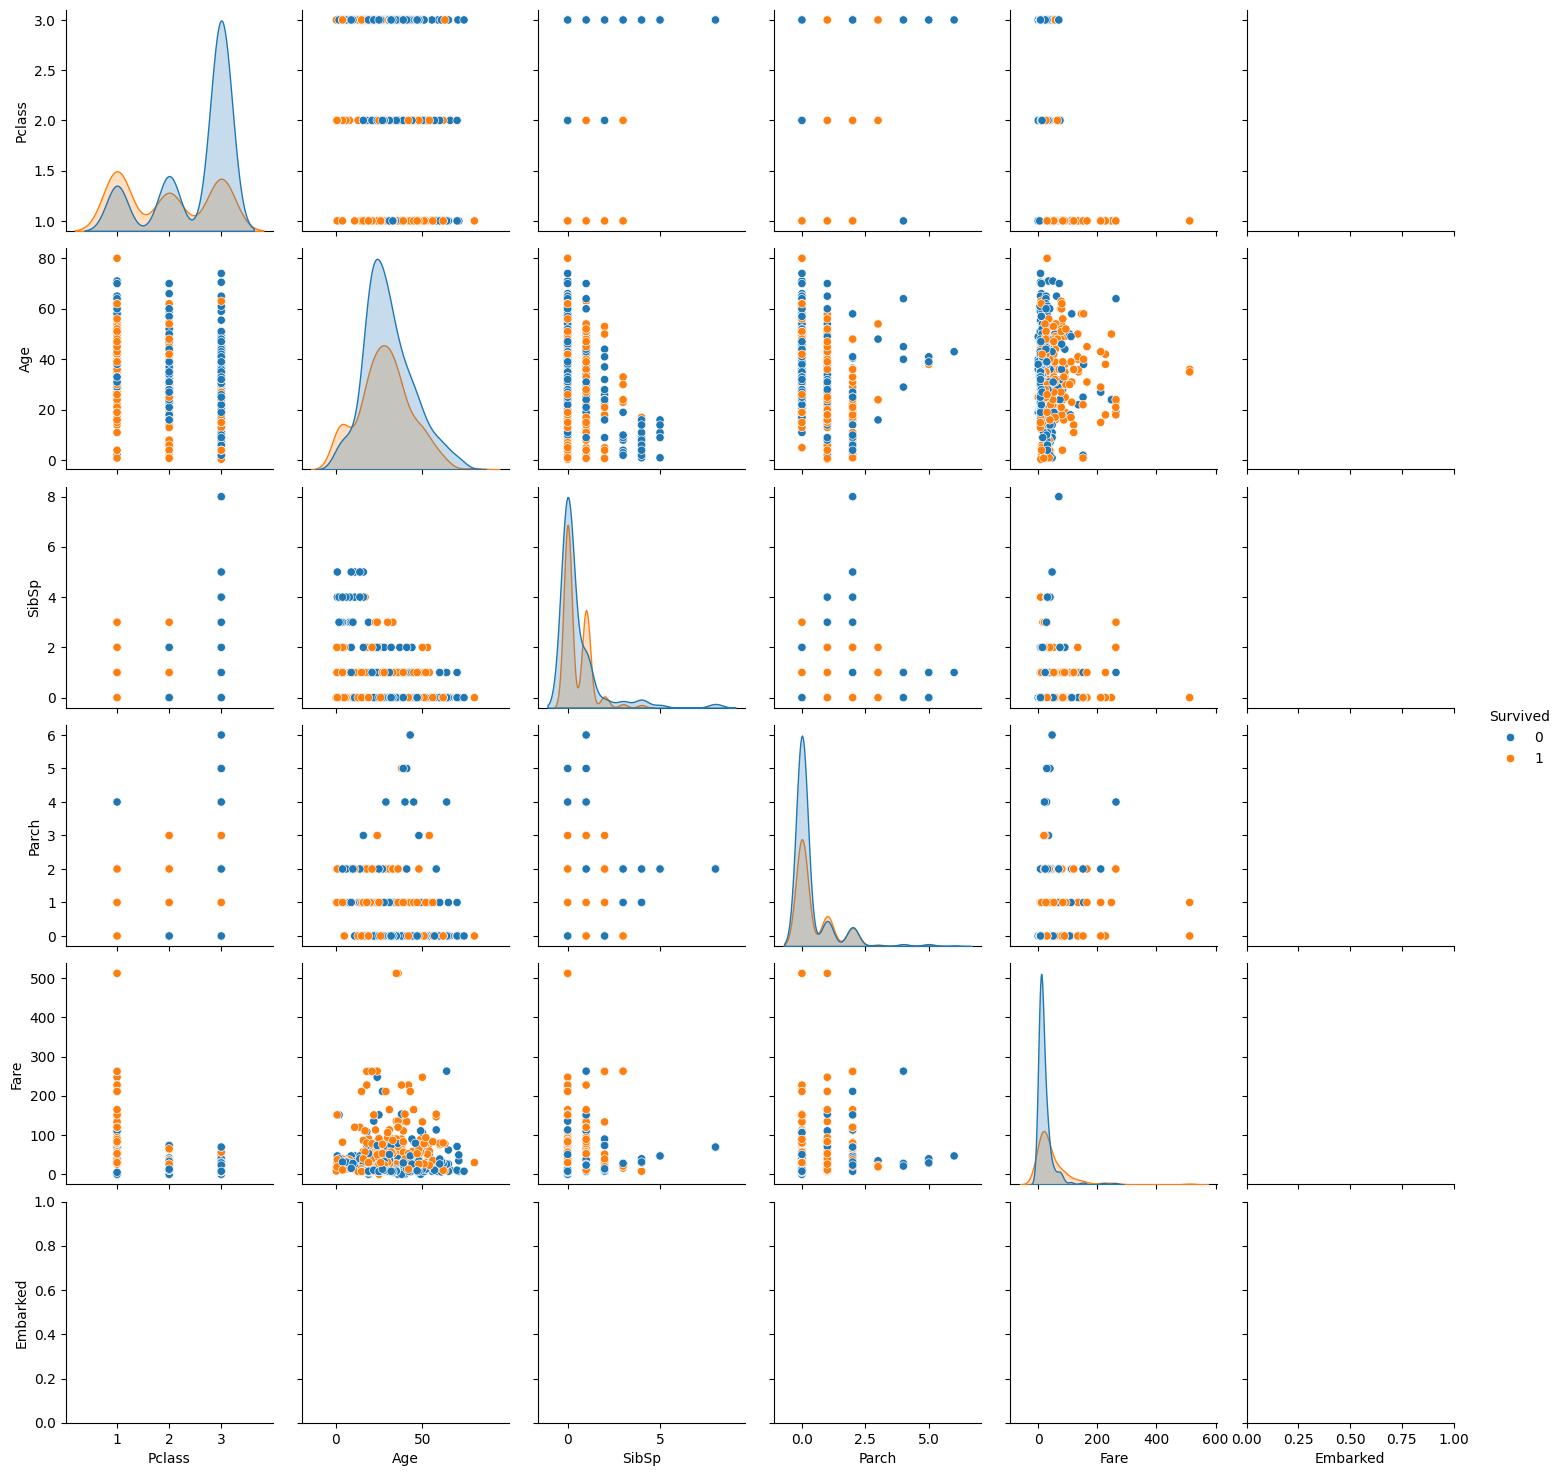

In [87]:
sns.pairplot(df,hue="Survived")
plt.show()

In [96]:
import numpy as np
mean=df["Age"].mean()
std=df["Age"].std()

df['Age'].fillna(np.random.normal(mean,std),inplace=True)

In [111]:
from sklearn.preprocessing import LabelEncoder
ln = LabelEncoder()
df['Sex']=ln.fit_transform(df['Sex'])

df['Embarked']=ln.fit_transform(df['Embarked'])

In [112]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

In [113]:
x.head(40)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,28,1,0,7.2500,0
1,1,0,52,1,0,71.2833,0
2,3,0,35,0,0,7.9250,0
3,1,0,48,1,0,53.1000,0
4,3,1,48,0,0,8.0500,0
5,3,1,34,0,0,8.4583,0
6,1,1,70,0,0,51.8625,0
7,3,1,6,3,1,21.0750,0
8,3,0,36,0,2,11.1333,0
9,2,0,18,1,0,30.0708,0


In [114]:
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [119]:
x_train.shape,y_train.shape

((801, 7), (801,))

In [120]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

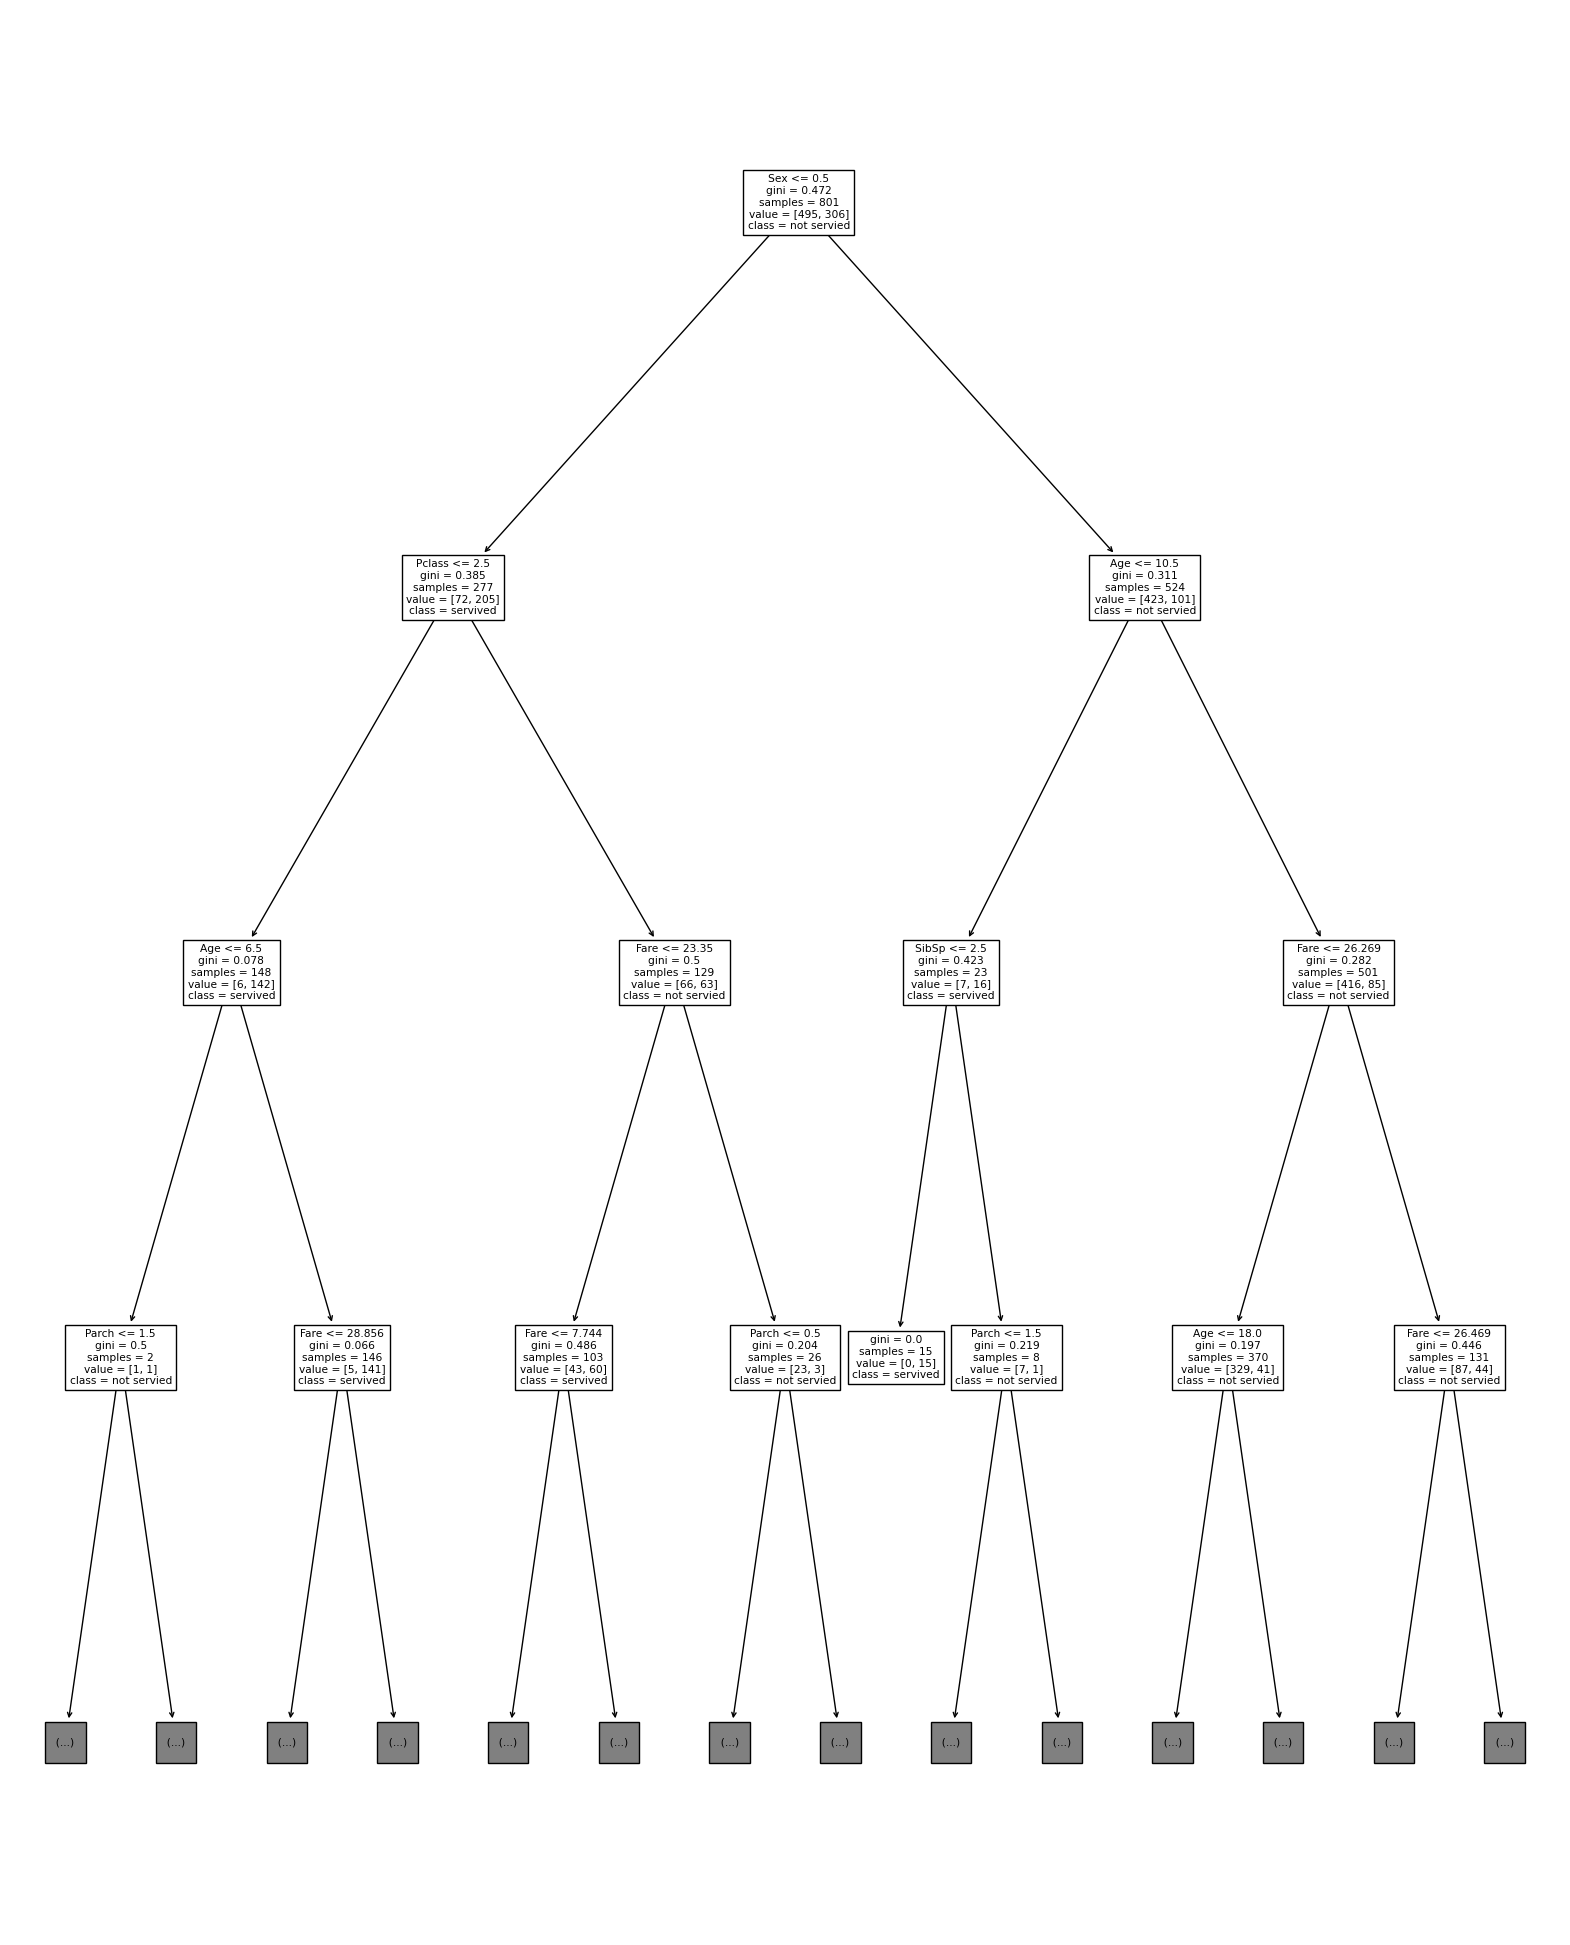

In [126]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,25))
plot_tree(model,feature_names=x.columns,class_names=["not servied","servived"],max_depth=3)
plt.show()

In [122]:
y_prid=model.predict(x_test)

In [123]:
y_prid

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [124]:
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score
precision_score(y_test,y_prid)

0.7045454545454546